<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.6_ttest/stats_ttest_twoSampleT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: The t-test family
# Two-samples t-test


In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

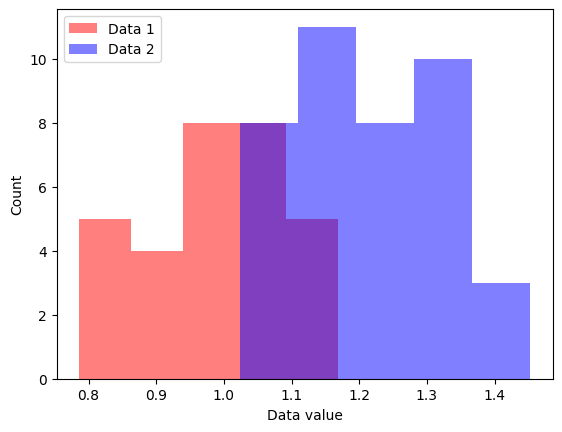

In [6]:
## generate the data

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1   # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2


# generate the data
data1 = mu1 + np.random.randn(n1)/10
data2 = mu2 + np.random.randn(n2)/10

# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1')
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [8]:
## now for the t-test

t,p = stats.ttest_ind(data1,data2,equal_var=False)

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))
# -8.15538, p=1.14424e-11 # equal_var = True

t(68) = -8.2948, p=7.88317e-12


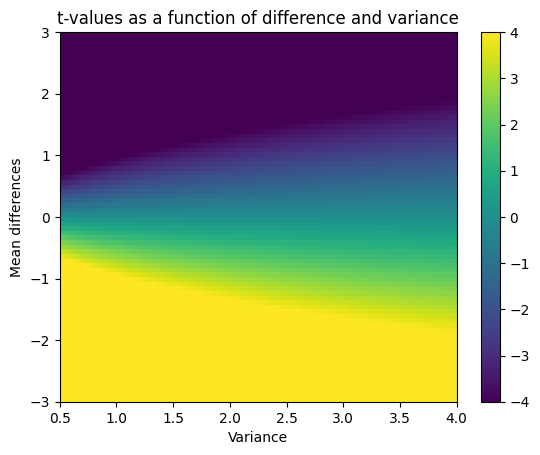

In [9]:
## a 2D space of t values

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):

        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)

        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den


plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()

---
# Importance of N for t-test
---

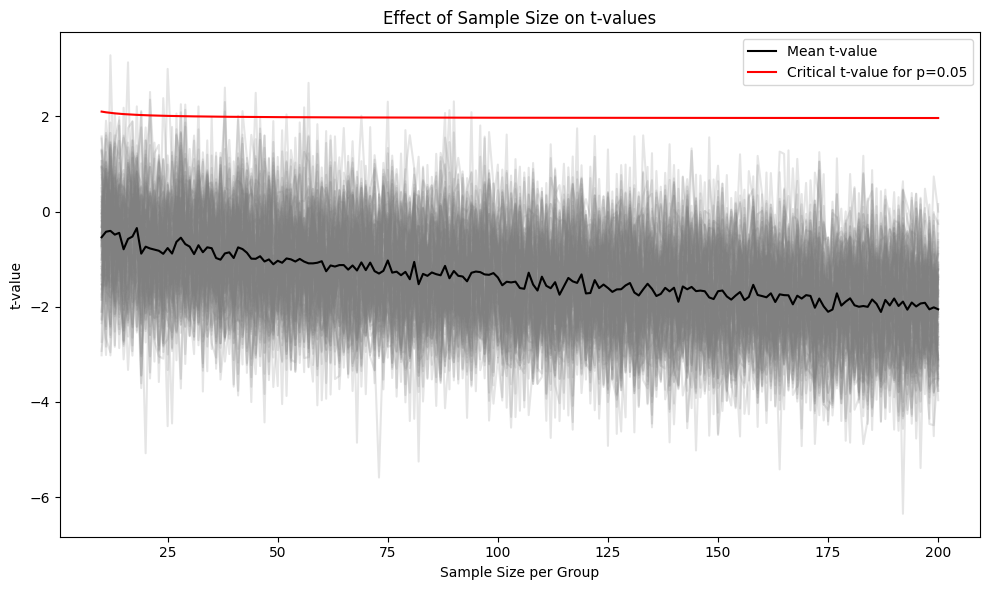

In [11]:

# Parameters for the simulation
mu1, mu2 = 1, 1.2  # Means of the two groups
n_reps = 100  # Number of repetitions per sample size
sample_sizes = np.arange(10, 201)  # Sample sizes from 10 to 200

# Initialize arrays to store the t-values and p-values for each sample size and repetition
t_values_all = np.zeros((len(sample_sizes), n_reps))  # To store t-values
p_values_all = np.zeros((len(sample_sizes), n_reps))  # To store p-values
critical_t = np.zeros(len(sample_sizes))  # Critical t-values for p=0.05

# Loop through different sample sizes
for idx, n in enumerate(sample_sizes):
    for rep in range(n_reps):
        # Generate random data for two groups based on the specified means
        data1 = mu1 + np.random.randn(n)  # Group 1 data with mean 1
        data2 = mu2 + np.random.randn(n)  # Group 2 data with mean 1.2

        # Perform the two-sample unpaired t-test
        t_stat, p_val = stats.ttest_ind(data1, data2, equal_var=True)

        # Store the t-values and p-values
        t_values_all[idx, rep] = t_stat
        p_values_all[idx, rep] = p_val

    # Compute the critical t-value for p=0.05 (two-tailed) with degrees of freedom df=n+n-2
    df = 2 * n - 2  # Degrees of freedom
    critical_t[idx] = stats.t.ppf(1 - 0.05/2, df)  # Critical t-value for p=0.05

# Compute the mean t-values across repetitions for each sample size
mean_t_values = np.mean(t_values_all, axis=1)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot individual t-values for each repetition (gray lines)
for rep in range(n_reps):
    plt.plot(sample_sizes, t_values_all[:, rep], color='gray', alpha=0.2)

# Plot the mean t-value across repetitions (black line)
plt.plot(sample_sizes, mean_t_values, color='black', label='Mean t-value')

# Plot the critical t-value for p=0.05 (red line)
plt.plot(sample_sizes, critical_t, color='red', label='Critical t-value for p=0.05')

# Adding labels, title, and legend
plt.xlabel('Sample Size per Group')
plt.ylabel('t-value')
plt.title('Effect of Sample Size on t-values')
plt.legend()
plt.tight_layout()
plt.show()

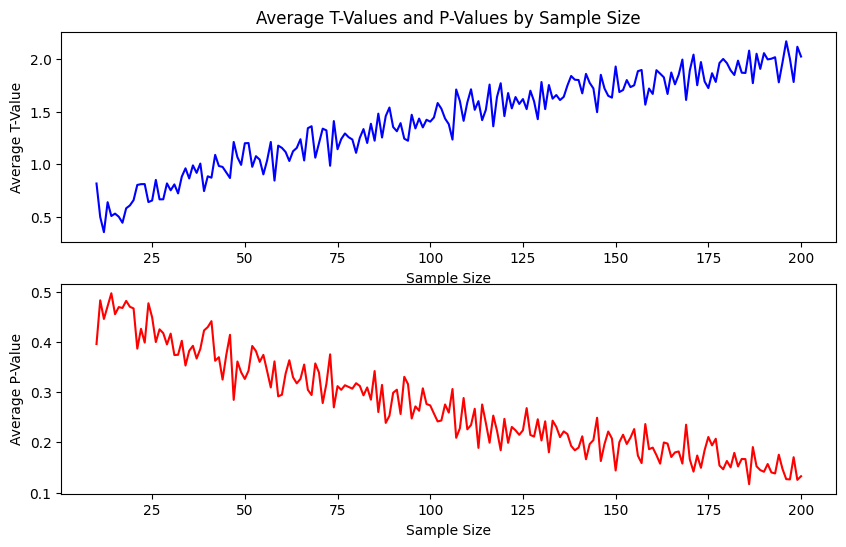

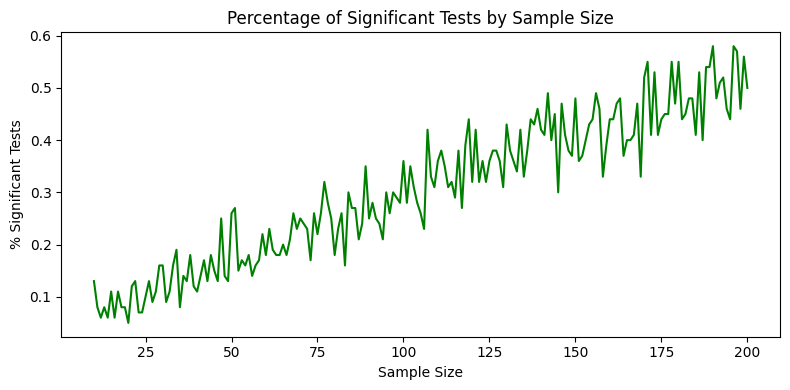

In [12]:
import pandas as pd
import seaborn as sns

# Parameters
mean1 = 1
mean2 = 1.2
num_data = np.arange(10, 201, 1)  # Sample sizes
dtv = 1  # Standard deviation
T_value = []
P_value = []
Tmean_value = []
Pmean_value = []
dataNum = []
num_exps = 100
significant_tests = []  # To count significant tests based on p < 0.05

# Simulation loop
for data_size in num_data:
    T_mean = []
    P_mean = []
    significant_count = 0  # Count significant p-values

    for number in range(1, num_exps + 1):
        data1 = np.random.normal(loc=mean1, scale=dtv, size=data_size)
        data2 = np.random.normal(loc=mean2, scale=dtv, size=data_size)

        # Perform the two-sample t-test
        t, p = stats.ttest_ind(data2, data1, equal_var=False)

        Tmean_value.append(t)
        Pmean_value.append(p)
        dataNum.append(data_size)

        T_mean.append(t)
        P_mean.append(p)

        # Count if p-value is below significance threshold
        if p < 0.05:
            significant_count += 1

    # Append the average t-value and p-value for each sample size
    T_value.append(np.mean(T_mean))
    P_value.append(np.mean(P_mean))

    # Track the percentage of significant tests
    significant_tests.append(significant_count / num_exps)

# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(num_data, T_value, label="T-Values", color='blue')
plt.title('Average T-Values and P-Values by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Average T-Value')

plt.subplot(2, 1, 2)
plt.plot(num_data, P_value, label="P-Values", color='red')
plt.xlabel('Sample Size')
plt.ylabel('Average P-Value')

# Plot percentage of significant tests
plt.figure(figsize=(8, 4))
plt.plot(num_data, significant_tests, label='% Significant Tests (p < 0.05)', color='green')
plt.title('Percentage of Significant Tests by Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('% Significant Tests')

plt.tight_layout()
plt.show()
